In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data_analytics.csv')

In [3]:
for i in data:
    print(i)
    print(data[i].unique())

Event Date
['2019-07-15' '2019-07-16' '2019-07-17' '2019-07-18' '2019-07-19'
 '2019-07-20' '2019-07-22' '2019-07-23' '2019-07-24' '2019-07-25'
 '2019-07-26' '2019-07-27' '2019-07-29' '2019-07-30' '2019-07-31'
 '2019-08-01' '2019-08-02' '2019-08-03' '2019-08-05' '2019-08-07'
 '2019-08-08' '2019-08-09' '2019-08-10' '2019-08-12' '2019-08-14'
 '2019-08-15' '2019-08-16' '2019-08-17' '2019-08-19' '2019-08-21'
 '2019-08-22' '2019-08-24']
App Apple ID
[1]
Subscription Name
['weekly 9.99 + 7D trial']
Standard Subscription Duration
['7 Days']
Promotional Offer Name
[nan]
Promotional Offer ID
[nan]
Subscription Offer Type
['Free Trial' nan]
Subscription Offer Duration
['7 Days' nan]
Marketing Opt-In Duration
[nan]
Customer Currency
['IDR' 'USD' 'INR' 'GBP' 'THB' 'TRY' 'TZS' 'QAR' 'AED' 'SAR' 'EUR' 'CHF'
 'HKD' 'PKR' 'VND' 'CAD' 'AUD' 'MYR' 'RUB' 'BRL' 'JPY' 'NGN' 'SEK' 'MXN'
 'PLN' 'COP' 'EGP' 'SGD' 'CLP' 'HUF' 'ILS' 'DKK' 'PHP' 'NOK']
Proceeds Currency
['IDR' 'USD' 'INR' 'GBP' 'THB' 'TRY' 'TZS' 

In [4]:
data.columns

Index(['Event Date', 'App Apple ID', 'Subscription Name',
       'Standard Subscription Duration', 'Promotional Offer Name',
       'Promotional Offer ID', 'Subscription Offer Type',
       'Subscription Offer Duration', 'Marketing Opt-In Duration',
       'Customer Currency', 'Proceeds Currency', 'Device', 'Country',
       'Subscriber ID', 'Subscriber ID Reset', 'Refund', 'Purchase Date',
       'Units'],
      dtype='object')

In [5]:
data.apply(lambda x: [len(x),x.nunique(), x.isna().sum()])

Event Date                          [2380, 32, 0]
App Apple ID                         [2380, 1, 0]
Subscription Name                    [2380, 1, 0]
Standard Subscription Duration       [2380, 1, 0]
Promotional Offer Name            [2380, 0, 2380]
Promotional Offer ID              [2380, 0, 2380]
Subscription Offer Type           [2380, 1, 1361]
Subscription Offer Duration       [2380, 1, 1361]
Marketing Opt-In Duration         [2380, 0, 2380]
Customer Currency                   [2380, 34, 0]
Proceeds Currency                   [2380, 34, 0]
Device                               [2380, 2, 0]
Country                             [2380, 65, 7]
Subscriber ID                     [2380, 1019, 0]
Subscriber ID Reset               [2380, 1, 2376]
Refund                            [2380, 0, 2380]
Purchase Date                     [2380, 0, 2380]
Units                                [2380, 1, 0]
dtype: object

In [6]:
COL_DROP = ['App Apple ID', 'Subscription Name', 'Standard Subscription Duration', 'Promotional Offer Name',
       'Promotional Offer ID','Marketing Opt-In Duration','Refund', 'Purchase Date','Units']

In [7]:
data.drop(columns=COL_DROP, inplace=True)

In [8]:
data.apply(lambda x: [len(x),x.unique(), x.isna().sum()])

Event Date                     [2380, [2019-07-15, 2019-07-16, 2019-07-17, 20...
Subscription Offer Type                          [2380, [Free Trial, nan], 1361]
Subscription Offer Duration                          [2380, [7 Days, nan], 1361]
Customer Currency              [2380, [IDR, USD, INR, GBP, THB, TRY, TZS, QAR...
Proceeds Currency              [2380, [IDR, USD, INR, GBP, THB, TRY, TZS, QAR...
Device                                                 [2380, [iPhone, iPad], 0]
Country                        [2380, [ID, US, IN, GB, CR, TH, TR, TZ, QA, AE...
Subscriber ID                  [2380, [223411322456765433, 223411322456765434...
Subscriber ID Reset                                     [2380, [nan, Yes], 2376]
dtype: object

In [9]:
(data['Subscription Offer Type'].isna() != data['Subscription Offer Duration'].isna()).sum()

0

In [10]:
data.drop(columns=['Subscription Offer Duration'], inplace=True)

In [11]:
data.head()

,Event Date,Subscription Offer Type,Customer Currency,Proceeds Currency,Device,Country,Subscriber ID,Subscriber ID Reset
0,2019-07-15,Free Trial,IDR,IDR,iPhone,ID,223411322456765433,NaN
1,2019-07-15,Free Trial,USD,USD,iPhone,US,223411322456765434,NaN
2,2019-07-15,Free Trial,INR,INR,iPhone,IN,223411322456765435,NaN
3,2019-07-15,Free Trial,GBP,GBP,iPhone,GB,223411322456765437,NaN
4,2019-07-15,Free Trial,INR,INR,iPhone,IN,223411322456765438,NaN


In [12]:
(data['Customer Currency'].isna() != data['Proceeds Currency'].isna()).sum()

0

In [13]:
data.drop(columns=['Customer Currency'], inplace=True)

In [14]:
data['Subscription Offer Type'] =  data['Subscription Offer Type'].fillna(1)

In [15]:
data['Subscription Offer Type'] = data['Subscription Offer Type'].replace({'Free Trial':0})

In [16]:
data['Subscriber ID'].nunique()

1019

In [17]:
data.columns

Index(['Event Date', 'Subscription Offer Type', 'Proceeds Currency', 'Device',
       'Country', 'Subscriber ID', 'Subscriber ID Reset'],
      dtype='object')

In [18]:
data.columns = ['Event_Date', 'Subscription_Offer_Type', 'Proceeds_Currency', 'Device',
       'Country', 'Subscriber_ID', 'Subscriber_ID_Reset']

In [19]:
data[data['Subscriber_ID'] == 223411322456765433]

,Event_Date,Subscription_Offer_Type,Proceeds_Currency,Device,Country,Subscriber_ID,Subscriber_ID_Reset
0,2019-07-15,0,IDR,iPhone,ID,223411322456765433,NaN
1019,2019-07-22,1,IDR,iPhone,ID,223411322456765433,NaN
1518,2019-07-29,1,IDR,iPhone,ID,223411322456765433,NaN
1870,2019-08-05,1,IDR,iPhone,ID,223411322456765433,NaN
2133,2019-08-12,1,IDR,iPhone,ID,223411322456765433,NaN
2288,2019-08-19,1,IDR,iPhone,ID,223411322456765433,NaN


In [20]:
data[data['Subscriber_ID'] == 223411322456765435]

,Event_Date,Subscription_Offer_Type,Proceeds_Currency,Device,Country,Subscriber_ID,Subscriber_ID_Reset
2,2019-07-15,0,INR,iPhone,IN,223411322456765435,NaN
1021,2019-07-22,1,INR,iPhone,IN,223411322456765435,NaN
1520,2019-07-29,1,INR,iPhone,IN,223411322456765435,NaN
1872,2019-08-05,1,INR,iPhone,IN,223411322456765435,NaN
2135,2019-08-12,1,INR,iPhone,IN,223411322456765435,NaN
2290,2019-08-19,1,INR,iPhone,IN,223411322456765435,NaN


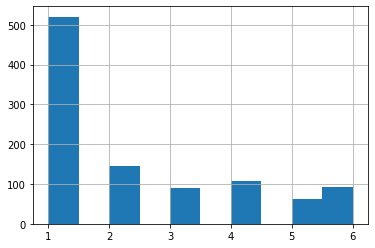

In [22]:
data.groupby('Subscriber_ID').apply(len).hist()

In [23]:
data[data['Subscriber_ID'] == 223411322456765435]#['Subscription_Offer_Type']

,Event_Date,Subscription_Offer_Type,Proceeds_Currency,Device,Country,Subscriber_ID,Subscriber_ID_Reset
2,2019-07-15,0,INR,iPhone,IN,223411322456765435,NaN
1021,2019-07-22,1,INR,iPhone,IN,223411322456765435,NaN
1520,2019-07-29,1,INR,iPhone,IN,223411322456765435,NaN
1872,2019-08-05,1,INR,iPhone,IN,223411322456765435,NaN
2135,2019-08-12,1,INR,iPhone,IN,223411322456765435,NaN
2290,2019-08-19,1,INR,iPhone,IN,223411322456765435,NaN


Тобто всі клієнти починають з Безкоштовної підписки

#  RESULT

In [24]:
C = 9.99*0.7

    Щодо формулювань:

    Conversion from trial — конверсія з тріалу в оплату.
    Dev proceeds — скільки отримує розробник після вирахування комісій.

    Валюта не враховується в розрахунках.
    На інших даних ваш код запускатись не буде.
    Результат у всіх один, але рішення може відрізнятися.
    
    
    LTV – lifetime value. У цьому випадку рахується через конверсії з тріалу в
    оплату і потім в наступні оплати. 

    LTV = ([1]+[2]+[3]+[4]+[5]), де [1] = (dev proceeds * Conversion to trial), а [2] = [1] * 1st
    purchase to 2nd, [3] = [2] * 2nd to 3rd і тд.

    Важливо! Apple Store забирає собі 30% від вартості підписки. LTV в цьому
    випадку ми будемо рахувати на 6 тижнів(1 тиждень тріалу та 5 підписки).

Тут всі клієнти починають обов'язково з Trial

**Так як На інших даних ваш код запускатись не буде**

In [28]:
data = pd.read_csv('data_analytics.csv')

RESULT  = ((data.groupby(['Subscriber ID']).apply(len) - 1)*9.99*0.7).reset_index()
RESULT = RESULT.rename(columns={0:'LTV'})

In [29]:
RESULT

,Subscriber ID,LTV
0,223411322456765433,34.965
1,223411322456765434,34.965
2,223411322456765435,34.965
3,223411322456765437,34.965
4,223411322456765438,34.965
...,...,...
1014,223411322456766800,0.000
1015,223411322456766801,0.000
1016,223411322456766802,0.000
1017,223411322456766805,0.000


Avarage LTV for customer

In [159]:
RESULT.LTV.mean()

9.34001275760553

In [30]:
RESULT.LTV.unique()

array([34.965, 27.972, 20.979, 13.986,  6.993,  0.   ])

# Same result

In [31]:
RESULT2 = (data.groupby(['Subscriber ID']).apply(len) - 1).reset_index().rename(columns={0:'LTV'})
RESULT2

,Subscriber ID,LTV
0,223411322456765433,5
1,223411322456765434,5
2,223411322456765435,5
3,223411322456765437,5
4,223411322456765438,5
...,...,...
1014,223411322456766800,0
1015,223411322456766801,0
1016,223411322456766802,0
1017,223411322456766805,0


In [32]:
RESULT2 = RESULT2.groupby(['LTV']).apply(len).reset_index().rename(columns={'LTV':'Count', 0:'LTV'})
RESULT2

,Count,LTV
0,0,520
1,1,146
2,2,91
3,3,107
4,4,63
5,5,92


In [33]:
RESULT2 = RESULT2.iloc[::-1]
RESULT2

,Count,LTV
5,5,92
4,4,63
3,3,107
2,2,91
1,1,146
0,0,520


In [34]:
RESULT2

,Count,LTV
5,5,92
4,4,63
3,3,107
2,2,91
1,1,146
0,0,520


In [35]:
RESULT2['Client'] = RESULT2.LTV.cumsum()

/Users/evgen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
RESULT2['Conv'] = RESULT2.Client/max(RESULT2.Client)
RESULT2

/Users/evgen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Count,LTV,Client,Conv
5,5,92,92,0.090285
4,4,63,155,0.152110
3,3,107,262,0.257115
2,2,91,353,0.346418
1,1,146,499,0.489696
0,0,520,1019,1.000000


In [37]:
RESULT2 = RESULT2.Conv.shift(1)/RESULT2.Conv
RESULT2

5         NaN
4    0.593548
3    0.591603
2    0.742210
1    0.707415
0    0.489696
Name: Conv, dtype: float64

In [38]:
RESULT2 = RESULT2[1:]
RESULT2

4    0.593548
3    0.591603
2    0.742210
1    0.707415
0    0.489696
Name: Conv, dtype: float64

4

In [45]:
ltv = []

ltv.append(C*RESULT2.loc[0])

for i in range(1, max(RESULT2.index)+1):
    ltv.append(ltv[-1]*RESULT2.loc[i])
    
ltv

[3.4244425907752696,
 2.4225014720314033,
 1.7980039254170757,
 1.0637046123650638,
 0.6313601570166829]

In [46]:
sum(ltv)

9.340012757605495